# **0. Setup - Imports/Function Declarations**

In [ ]:
# -- Import packages -- #

#Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Modelling Packages
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# IMPORTS: df (dataframe), binary_col (str), cont_col(str), title(str), x(str)
# PURPOSE: Plot two histograms for the conitinuous variable; one for positive (1) and one for negative (0) on the binary variables

def plot2Hist(df, binary_col, cont_col, title, x):
  fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True) # Each histogram will share the same x value for better comparison representation. They don't share y axis as population sizes (and therefore frequency) may be different
  fig.tight_layout()
  ax1.hist(df.loc[df[binary_col] == 1][cont_col], edgecolor='k', color="#ff7f0e")
  ax1.set_title("Positive")
  ax1.set_xlabel(x)
  ax1.set_ylabel("Frequency")
  ax2.hist(df.loc[df[binary_col] == 0][cont_col], edgecolor='k');
  ax2.set_title("Negative")
  ax2.set_xlabel(x)
  ax2.set_ylabel("Frequency")
  fig.suptitle(title, fontsize=16, y=1.1);


# **1. Data Retrieval and Preparation**

In [ ]:
# Data Path
data_path = "http://titan.csit.rmit.edu.au/~s3784440/DataSet/Cervical%20Cancer%20Behavior%20Risk-DataSet.csv"

In [ ]:
df = pd.read_csv(data_path, sep=',', decimal='.', header=0)

In [ ]:
df

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0


In [ ]:
df.shape

(72, 20)

*When discussing accuracy, it will be justified to consider the relatively low row count. (**lack of data**)*

In [ ]:
# NA VALUES

print("\033[1mColumns With na Values\033[0m")
print(df.isna().any())

Columns With na Values
behavior_sexualRisk           False
behavior_eating               False
behavior_personalHygine       False
intention_aggregation         False
intention_commitment          False
attitude_consistency          False
attitude_spontaneity          False
norm_significantPerson        False
norm_fulfillment              False
perception_vulnerability      False
perception_severity           False
motivation_strength           False
motivation_willingness        False
socialSupport_emotionality    False
socialSupport_appreciation    False
socialSupport_instrumental    False
empowerment_knowledge         False
empowerment_abilities         False
empowerment_desires           False
ca_cervix                     False
dtype: bool


In [ ]:
# DATA TYPES

print("\033[1mData Types\033[0m")
df.dtypes

Data Types


behavior_sexualRisk           int64
behavior_eating               int64
behavior_personalHygine       int64
intention_aggregation         int64
intention_commitment          int64
attitude_consistency          int64
attitude_spontaneity          int64
norm_significantPerson        int64
norm_fulfillment              int64
perception_vulnerability      int64
perception_severity           int64
motivation_strength           int64
motivation_willingness        int64
socialSupport_emotionality    int64
socialSupport_appreciation    int64
socialSupport_instrumental    int64
empowerment_knowledge         int64
empowerment_abilities         int64
empowerment_desires           int64
ca_cervix                     int64
dtype: object

In [ ]:
# For each column in the dataframe
for column_name in df:
    #==================================================================
    ### GENERAL CLEANING OF DATA TYPES
    
    # if the column data type is an int
    if df[column_name].dtype == 'int64':
        # invert the polarity to positive
        df.loc[df[df[column_name]<0].index, column_name] = df.loc[df[df[column_name]<0].index, column_name]*-1
    
     # if the column data type is a float        
    if df[column_name].dtype == "float64":
        # invert the polarity to positive
        df.loc[df[df[column_name]<0].index, column_name] = df.loc[df[df[column_name]<0].index, column_name]*-1
        
    

# **2. Data Exploration**

## **Pairplots (broken up into quarters for easier viewing)**

In [ ]:
len(df.columns)

20

In [ ]:
# ## FE: I recommend to get rid of this hard coding
d1 = df.iloc[:, :5]
d1 = d1.join(df["ca_cervix"])
d2 = df.iloc[:, 5:10] 
d2 = d2.join(df["ca_cervix"])
d3 = df.iloc[:, 10:15] 
d3 = d3.join(df["ca_cervix"])
d4 = df.iloc[:, 15:19] 
d4 = d4.join(df["ca_cervix"])


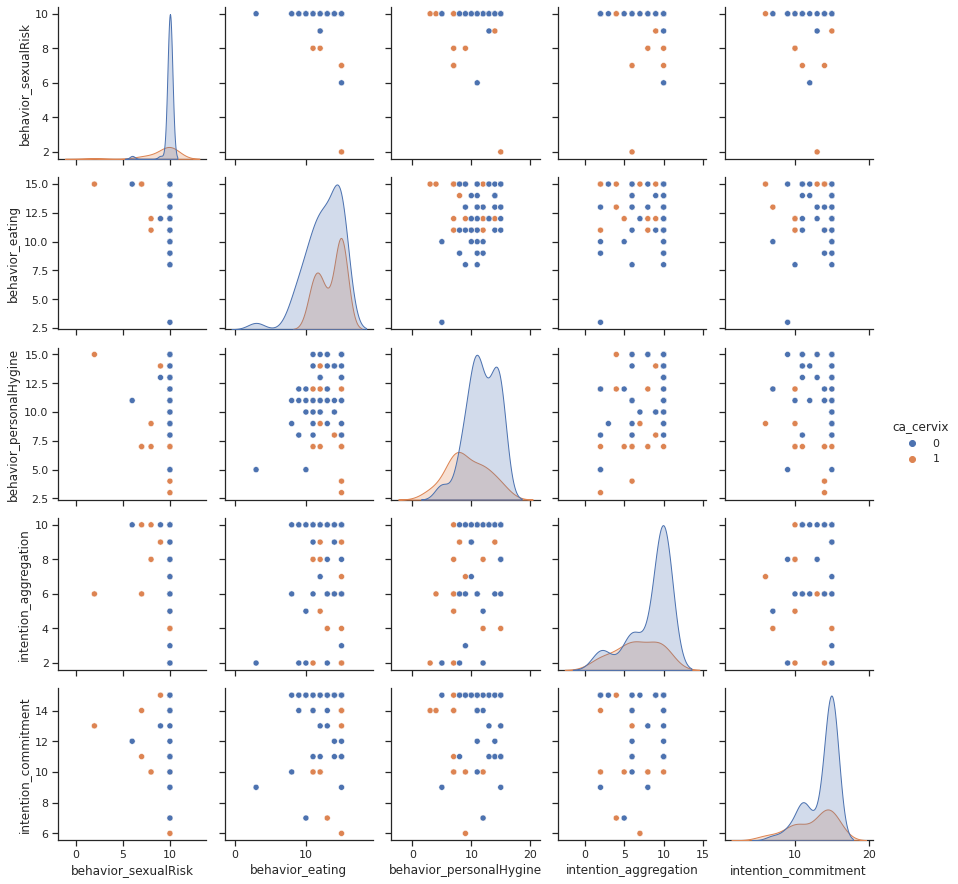

In [ ]:
# #SEABORNE INOP TO SAVE TIME FOR THE TIME BEING
sns.set_theme(style="ticks")
sns.pairplot(d1, hue="ca_cervix")

In [ ]:
# sns.pairplot(d2, hue="ca_cervix")


In [ ]:
# sns.pairplot(d3, hue="ca_cervix")

In [ ]:
# sns.pairplot(d4, hue="ca_cervix")

Looking at the histograms, we can see that the distributions that are the most different from each other include:

---

    - behaviour_personalHygine
    - intention_commitment
    * norm_fulfillment
    * perception_vulnerability
    ~ perception_severity
    ~ motivation_strength
    ~ motivation_willingness
    ~ socialSupport_emotionality
    + empowerment_knowledge
    + empowerment_abilities
    + empowerment_desires



With that noted, these will make for ideal features in the training model

## **Graphs**

### Personal Hygeine

*Participants with cervical cancer tend to have lower levels of hygeine than participants without cervical cancer*

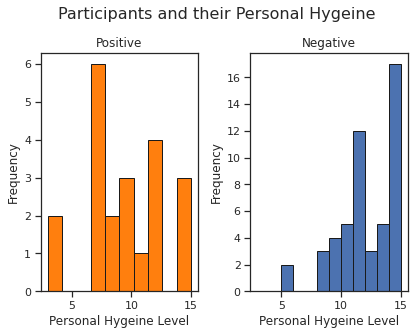

In [ ]:
plot2Hist(df, "ca_cervix", "behavior_personalHygine", "Participants and their Personal Hygeine", "Personal Hygeine Level")

Positive participants' hygeine rating follows closest to a 'normal/symmetrical' shape, whereas negative participants' hygeine rating follows a 'skewed-right' pattern. This suggests that those who test positive will likely have a lower personal hygeine rating. Therefore, this graph supports the hypothesis.

### General Commitment/Intent to Committ

*Cancer positive participants will experience lower levels of general commitment as opposed to cancer negative participants*

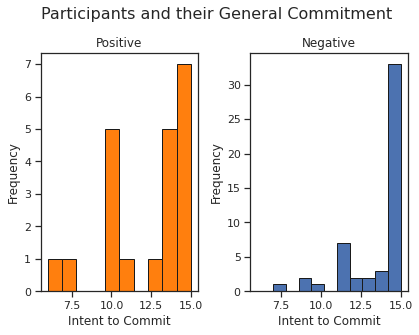

In [ ]:
plot2Hist(df, "ca_cervix", "intention_commitment", "Participants and their General Commitment", "Intent to Commit")

The distribution for cancer-negative participants is left-skewed/negative-skewed, meaning they have a generally high intent to commit. The distribution for cancer-positive participants doesn't exactly mirror the shape of the cancer-negative participants, although it does have a lower minimum and is more evenly spread. Therefore, it does support the hypothesis, but not to a great extent.

### Normal Fulfillment

*Participants who have cancer will generally feel much less fulfilled than those who do not.*

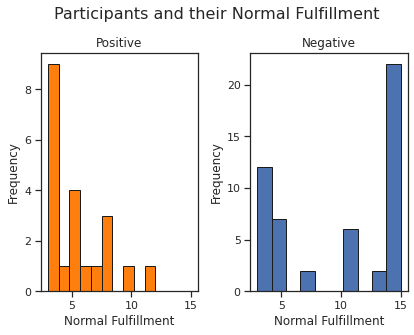

In [ ]:
plot2Hist(df, "ca_cervix", "norm_fulfillment", "Participants and their Normal Fulfillment", "Normal Fulfillment")

The graphs almost mirror each other, with cancer-positive participants having a right-skewed distribution and cancer-negative participants having a more evenly spread distribution - but the highest frequency towards the right side of the graph. This means that most cancer-positive participants will feel a low level of fulfillment, whereas those who do not have cancer will liekly feel a higher level of commitment. It is important to note that several other factors can be affecting one's fulfillment, which may explain why there are occurences of cancer-negative participants in the '<5' range. However, the graph for cancer-positive participants does imply that their low fulfillment is mainly attributed to the presence of cancer. This supports the hypothesis.

### Perception of Self-Vulnerability

*Participants who have cervical cancer will feel greatly more vulnerable than participants who are free of cancer.*

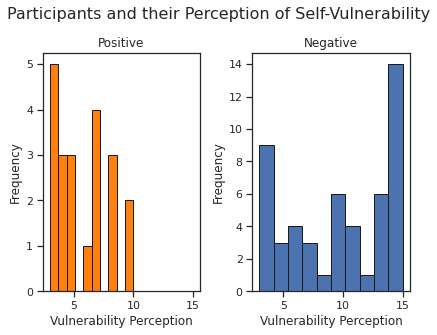

In [ ]:
plot2Hist(df, "ca_cervix", "perception_vulnerability", "Participants and their Perception of Self-Vulnerability", "Vulnerability Perception")

Negative participants are rather evenly distribuited, probably due to the fact that vulnerability can stem from other factors such as depression and tragedy. On the other hand, participants who tested positive only had a maximum of 10, whereas cancer-negative participants had a maximum of 10. Thus, these graphs do support the hypothesis but not to a great extent.

### Perception of Severity

*Participants who test positive for cervical cancer will have a lower perception of severity than those who do not.*

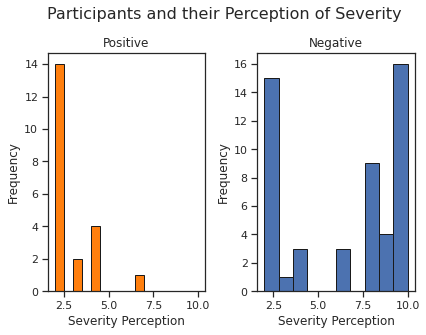

In [ ]:
plot2Hist(df, "ca_cervix", "perception_severity", "Participants and their Perception of Severity", "Severity Perception")

In this case, the graphs greatly suppor the hypothesis. The highest frequency of cancer-positive participants occured at the minimum (<2.5) range, with the maximum score being less than 7.5. Cancer negative participants, however, were much more evenly spread with their highest frequency being at the maximum value (between 9 and 10). This can be attributed to the fact that those with cervical cancer already feel a great deal of grief, thus the negative consequences associated with events may not be perceived as severe.

### Willingness

*Participants diagnosed with cervical cancer will a great a very low level of willingness compared to patients who test negative.*

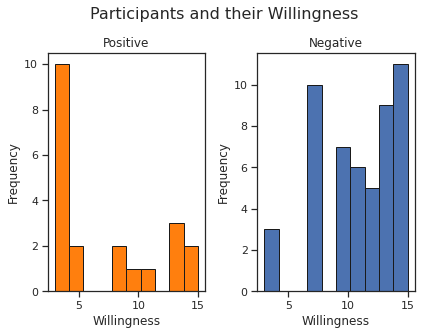

In [ ]:
plot2Hist(df, "ca_cervix", "motivation_willingness", "Participants and their Willingness", "Willingness")

Similar to the graphs for severity perception, the graphs here support the hypothesis as once again, the highest frequency for cancer-positive occurs at the minimum whereas the highest frequency for cancer-negative occurs at the maximum. This may be attributed to the fact that participants who have cancer will not feel a value in accomplishing tasks, due to the negative impacts of their current condition.

### Motivation

*Participants who do not have cancer will feel more motivated than participants who do not have cancer*

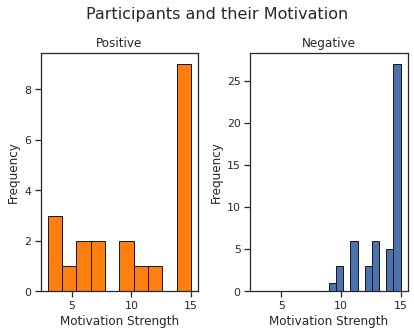

In [ ]:
plot2Hist(df, "ca_cervix", "motivation_strength", "Participants and their Motivation", "Motivation Strength")

Surprisingly, the graphs only moderately supported the hypothesis. Both distributions are more or less left-skewed, with both of their highest frequency occuring in the maximum bin. Cancer positive participants, though, recorded a much lower minimum at approximately 4, compared to cancer negative participants' minimum of around 9. Therefore, this attribute is still eligible to be a feature in the machine learning model, it is just not as effective as the other attributes.

### Emotional Support

*Participants who have cervcical cancer will receive more emotional support than those who do not*

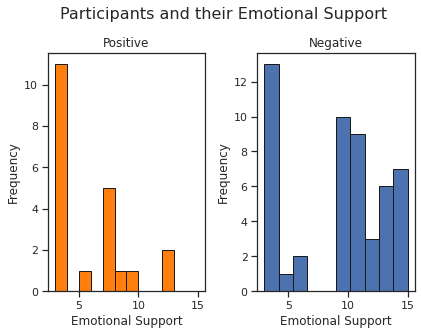

In [ ]:
plot2Hist(df, "ca_cervix", "socialSupport_emotionality", "Participants and their Emotional Support", "Emotional Support")

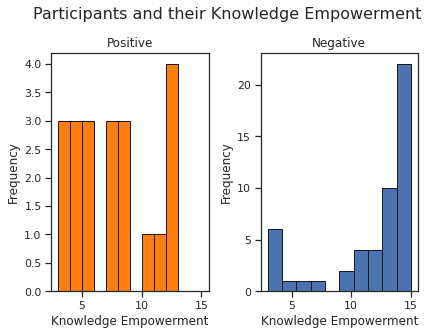

In [ ]:
plot2Hist(df, "ca_cervix", "empowerment_knowledge", "Participants and their Knowledge Empowerment", "Knowledge Empowerment")

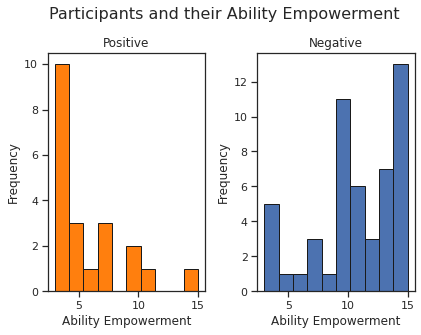

In [ ]:
plot2Hist(df, "ca_cervix", "empowerment_abilities", "Participants and their Ability Empowerment", "Ability Empowerment")

### Level of Desire

*Participants with cervical cancer will feel a much lower level of desire than participants who do not have cervical cancer*

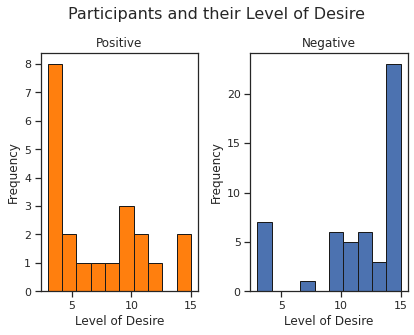

In [ ]:
plot2Hist(df, "ca_cervix", "empowerment_desires", "Participants and their Level of Desire", "Level of Desire")

The distribution histograms for desire level almost mirrors each other between cancer positive and cancer negative, as one is skewed right (positive) while the other is skewed left (negative). This proves the hypothesis correct 

### **Statistical Analysis**

In [ ]:
attrs = ["behavior_personalHygine",
"intention_commitment",
"norm_fulfillment",
"perception_vulnerability",
"perception_severity",
"motivation_strength",
"motivation_willingness",
"socialSupport_emotionality",
"empowerment_knowledge",
"empowerment_abilities",
"empowerment_desires"] # Features that were graphed

rows = [] # 2-d array to be used for tabulate method
for attr in attrs:
  row = []
  pos_mean = df.loc[df["ca_cervix"] == 1][attr].mean() # positive participants
  neg_mean = df.loc[df["ca_cervix"] == 0][attr].mean() # negative participants
  row.extend([attr, pos_mean, neg_mean, abs(pos_mean-neg_mean)]) # Each row has attr name, mean1, mean2, and the difference
  rows.append(row) # Add to 2-d array

print("Attribute\t\t\tPositive Mean \t\t Negative Mean \t\t Difference\n")
for row in rows:
  print(row[0] + ":      " + "\t" + str(row[1]) + "\t" + str(row[2]) + "\t" + str(row[3]))

Attribute			Positive Mean 		 Negative Mean 		 Difference

behavior_personalHygine:      	9.333333333333334	11.803921568627452	2.4705882352941178
intention_commitment:      	12.476190476190476	13.705882352941176	1.2296918767506995
norm_fulfillment:      	5.238095238095238	9.823529411764707	4.585434173669468
perception_vulnerability:      	5.714285714285714	9.666666666666666	3.9523809523809517
perception_severity:      	2.7142857142857144	6.490196078431373	3.775910364145658
motivation_strength:      	10.333333333333334	13.607843137254902	3.2745098039215677
motivation_willingness:      	6.9523809523809526	10.823529411764707	3.871148459383754
socialSupport_emotionality:      	5.523809523809524	9.156862745098039	3.633053221288515
empowerment_knowledge:      	7.285714285714286	11.882352941176471	4.596638655462185
empowerment_abilities:      	5.809523809523809	10.764705882352942	4.955182072829133
empowerment_desires:      	7.095238095238095	11.588235294117647	4.492997198879552


To find which attribute contributed the most to the presence of cervical cancer, each mean was tested for cancer-positive and cancer-negative participants. A high difference in mean values could suggest that a strong correlation exists. In this case, a patient's abilities is the most likely determinant of cervical cancer presence. In addition, 3 of the top 5 attributes with the highest mean differences fell under the "empowerment" category. This suggests that a patient's empowerment is strongly affected by the presence of cervical cancer, and thus they are appropriate features for modelling.

# **3. Data Modelling - Classification**

## Part 1) Hill Climbing: K-Nearest-Neighbor


In [ ]:
# Set Target
target = df['ca_cervix']

In [ ]:
target

0     1
1     1
2     1
3     1
4     1
     ..
67    0
68    0
69    0
70    0
71    0
Name: ca_cervix, Length: 72, dtype: int64

In [ ]:
# Set Data
data = df.drop(columns="ca_cervix")
data.columns

Index(['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygine',
       'intention_aggregation', 'intention_commitment', 'attitude_consistency',
       'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
       'perception_vulnerability', 'perception_severity',
       'motivation_strength', 'motivation_willingness',
       'socialSupport_emotionality', 'socialSupport_appreciation',
       'socialSupport_instrumental', 'empowerment_knowledge',
       'empowerment_abilities', 'empowerment_desires'],
      dtype='object')

In [ ]:
data

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15


In [ ]:
data.shape

(72, 19)

In [ ]:
target.shape

(72,)

In [ ]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 20
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

In [ ]:
for cur_f in range(0, col_num):
  new_Ind.append(col_Ind_Random[cur_f]) # Add the new column
  newData = df.iloc[:, new_Ind]         # Add all rows from the column

  # train the data and perform test the data
  X_train, X_test, y_train, y_test = train_test_split(newData, target,  test_size=0.4, random_state=1)

  # set k value to 5 (trial and error found this one well)
  clf = KNeighborsClassifier(5, weights='distance', p=1)

  # fit classification model
  fit = clf.fit(X_train, y_train)

  # get current score of classification
  cur_Score = clf.score(X_test, y_test)

  # remove or keep condition for feature
  if (cur_Score <= cur_MaxScore) or (cur_Score == 1.0): # preventing overfitting by removing anything that equals to 1.0
    new_Ind.remove(col_Ind_Random[cur_f])
  else:
    cur_MaxScore = cur_Score
    print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.6896551724137931
Score with 2 selected features: 0.7586206896551724
Score with 3 selected features: 0.8620689655172413
Score with 4 selected features: 0.9310344827586207
Score with 5 selected features: 0.9655172413793104


In [ ]:
selected_data = df.iloc[:, new_Ind]

In [ ]:
# selected data for the training derived from feature selection
selected_data

,intention_aggregation,perception_severity,socialSupport_appreciation,intention_commitment,socialSupport_emotionality
0,4,3,7,7,5
1,10,2,6,14,7
2,2,2,6,14,3
3,10,2,4,15,7
4,8,2,6,10,3
...,...,...,...,...,...
67,10,10,8,15,9
68,10,8,7,15,11
69,6,8,7,10,9
70,10,10,8,13,11


In [ ]:
# train and test data
X_train, X_test, y_train, y_test = train_test_split(selected_data, target, test_size=0.4, random_state=2)

In [ ]:
# classification model set k value to 5 (as per previous found this one well)
clf = KNeighborsClassifier(5, weights='distance', p=1)

We choose to have the K value = 5 because the number of features identified by the algorithm finds 5 to be sufficient for such operations. The model now has good predictive power and can generalise well unseen data.

In [ ]:
# fit classification model
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')

In [ ]:
# Predict the values
predicted = clf.predict(X_test)

In [ ]:
# Construct confusion matrix
cm = confusion_matrix(y_test, predicted)

In [ ]:
# print confusion matrix
print(cm)

[[21  1]
 [ 2  5]]


In [ ]:
# Print classification Report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.83      0.71      0.77         7

    accuracy                           0.90        29
   macro avg       0.87      0.83      0.85        29
weighted avg       0.89      0.90      0.89        29



In [ ]:
new_Ind

[3, 10, 14, 4, 13]

In [ ]:
print(accuracy_score(y_test, predicted))

0.896551724137931


In [ ]:
X_train.shape

(43, 5)

In [ ]:
X_test.shape

(29, 5)

In [ ]:
df.shape

(72, 20)

## Part 2) Decision Trees

In [ ]:
from sklearn.model_selection import train_test_split # splitting data
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn import metrics # for accuracy

In [ ]:
# Split data

feature_cols = ["empowerment_desires", "empowerment_abilities", "empowerment_knowledge", "socialSupport_emotionality", "motivation_strength", "motivation_willingness", "perception_severity", "perception_vulnerability", "norm_fulfillment", "intention_commitment", "behavior_personalHygine"] # select features
X = df[feature_cols].values # features
y = df.ca_cervix # target
print(X.shape)
print(y.shape)

(72, 11)
(72,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

In [ ]:
# Build model

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Measure predictions

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8275862068965517


In [ ]:
# Measure predictions

from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[19  3]
 [ 2  5]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.62      0.71      0.67         7

    accuracy                           0.83        29
   macro avg       0.76      0.79      0.78        29
weighted avg       0.84      0.83      0.83        29



In [ ]:
from sklearn import tree

with open('cervical_cancer.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file= f,
feature_names=feature_cols,
class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
    
# Exports to dot file, can be viewed on graphviz

As we can see from the data evaluation, the decision tree algorithm can be used for selecting the features and its outcomes, though its accuracy is less than that of K-Nearest Neighbours with the Hill Climbing Algorithm.